<a href="https://colab.research.google.com/github/dntwaritag/linear_regression_model/blob/main/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 0: Import all necessary packages**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.preprocessing import LabelEncoder

**Step 1: Load and Explore the Dataset**

In [109]:
# Load the dataset
file_path = '/content/drive/MyDrive/Mathematics for Machine Learning/seattle-weather.csv'  # Adjust as necessary
df = pd.read_csv(file_path)

In [110]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the dataset by date
df = df.sort_values('date')

In [111]:
# Check the first few rows of the dataset
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [112]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [113]:
# Summary statistics
df.describe()

,date,precipitation,temp_max,temp_min,wind
count,1461,1461.000000,1461.000000,1461.000000,1461.000000
mean,2013-12-31 00:00:00,3.029432,16.439083,8.234771,3.241136
min,2012-01-01 00:00:00,0.000000,-1.600000,-7.100000,0.400000
25%,2012-12-31 00:00:00,0.000000,10.600000,4.400000,2.200000
50%,2013-12-31 00:00:00,0.000000,15.600000,8.300000,3.000000
75%,2014-12-31 00:00:00,2.800000,22.200000,12.200000,4.000000
max,2015-12-31 00:00:00,55.900000,35.600000,18.300000,9.500000
std,NaN,6.680194,7.349758,5.023004,1.437825


**Step 2: Data Preprocessing**

In [114]:
# Add lag features
df['lag_wind_1'] = df['wind'].shift(1)
df['lag_precipitation_1'] = df['precipitation'].shift(1)
df['lag_temp_max_1'] = df['temp_max'].shift(1)
df['lag_temp_min_1'] = df['temp_min'].shift(1)

In [115]:
# Drop rows with NaN values caused by lagging
df.dropna(inplace=True)

In [116]:
# Encode 'weather' using Label Encoding
label_encoder = LabelEncoder()
df['weather_encoded'] = label_encoder.fit_transform(df['weather'])
# Save label encoders
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [117]:
# Select relevant features for prediction
X = df[['lag_wind_1', 'lag_precipitation_1', 'lag_temp_max_1', 'lag_temp_min_1', 'weather_encoded']]
y = df['wind']

**Step 3: Train-Test Split (Time Series)**

In [118]:
# Time-based split: 80% training, 20% testing
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

**Step 4: Visualizations**

1. Time Series Plot for Wind Speed

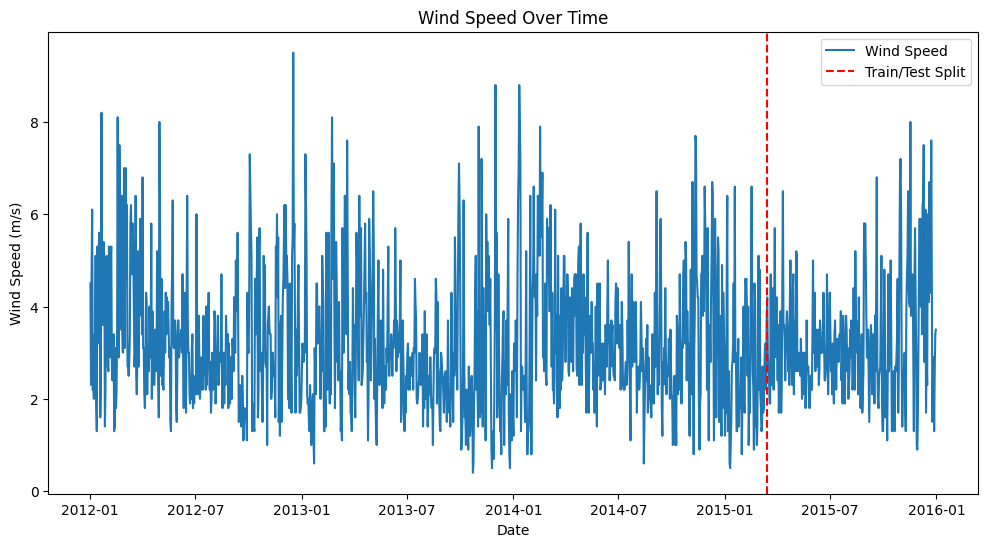

In [119]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['wind'], label='Wind Speed')
plt.axvline(df['date'].iloc[split_index], color='red', linestyle='--', label='Train/Test Split')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

2. Correlation Heatmap

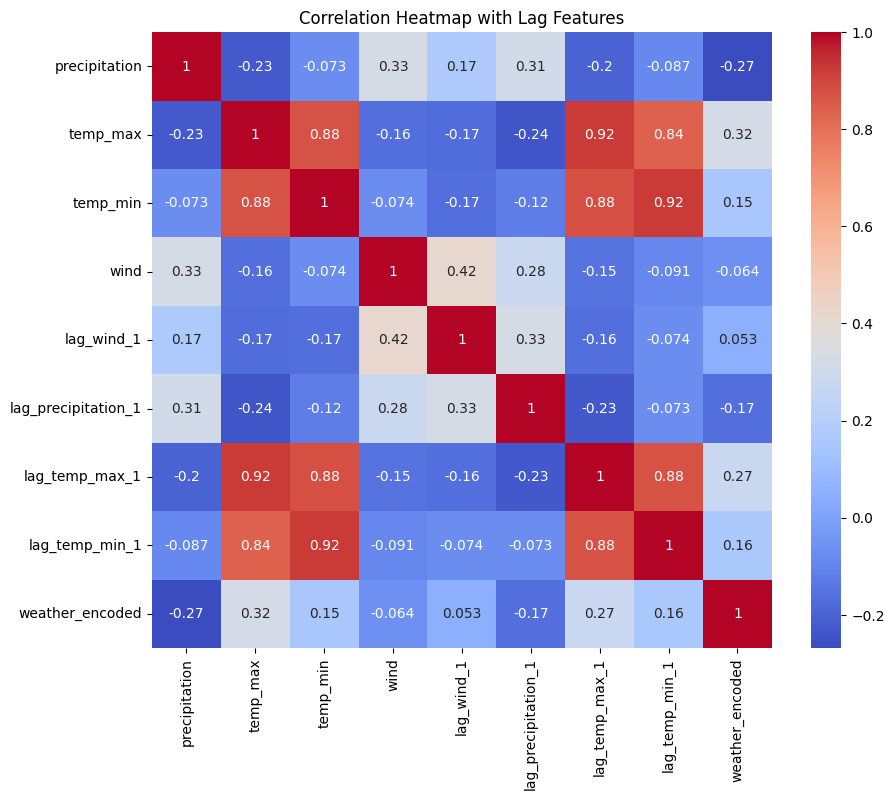

In [120]:
# Before calculating the correlation, exclude the non-numeric columns
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Lag Features')
plt.show()

**Step 5: Model Creation and Training**

1. Linear Regression Model

In [121]:
# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [122]:
# Predict and evaluate
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression MSE: {mse_linear}')

Linear Regression MSE: 1.346356665797113


In [123]:
# Save the Linear Regression model
joblib.dump(linear_model, 'linear_model_timeseries.pkl')

['linear_model_timeseries.pkl']

2. Decision Tree Model

In [124]:
# Train Decision Tree Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [125]:
# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Decision Tree MSE: {mse_tree}')

Decision Tree MSE: 2.6055565068493145


In [126]:
# Save the Decision Tree model
joblib.dump(tree_model, 'decision_tree_timeseries_model.pkl')

['decision_tree_timeseries_model.pkl']

3. Random Forest Model

In [127]:
# Train Random Forest Model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [128]:
# Predict and evaluate
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f'Random Forest MSE: {mse_forest}')

Random Forest MSE: 1.349393688031268


In [129]:
# Save the Random Forest model
joblib.dump(forest_model, 'random_forest_timeseries_model.pkl')

['random_forest_timeseries_model.pkl']

**Step 6: Model Comparison and Best Model Selection**

In [130]:
# Comparing all models
print("Model Comparison:")
print(f"Linear Regression MSE: {mse_linear}")
print(f"Decision Tree MSE: {mse_tree}")
print(f"Random Forest MSE: {mse_forest}")

Model Comparison:
Linear Regression MSE: 1.346356665797113
Decision Tree MSE: 2.6055565068493145
Random Forest MSE: 1.349393688031268


In [131]:
# Identify and save the best model
if mse_linear <= mse_tree and mse_linear <= mse_forest:
    best_model = linear_model
    print("Best model: Linear Regression")
elif mse_tree <= mse_forest:
    best_model = tree_model
    print("Best model: Decision Tree")
else:
    best_model = forest_model
    print("Best model: Random Forest")

Best model: Linear Regression


In [132]:
# Save the best model
joblib.dump(best_model, 'best_timeseries_model.pkl')

['best_timeseries_model.pkl']

**Step 7: Visualize the Final Linear Fit**

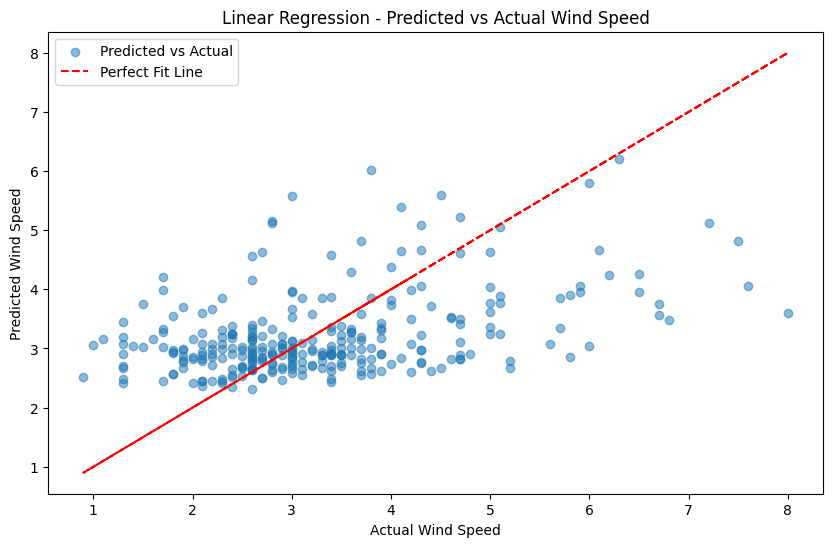

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Fit Line')
plt.title('Linear Regression - Predicted vs Actual Wind Speed')
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.legend()
plt.show()

Step 8: Making a Prediction on a Single Data Point

In [134]:
# Example prediction using the best model
sample_input = X_test.iloc[0].to_numpy().reshape(1, -1)
predicted_wind_speed = best_model.predict(sample_input)
print(f"Predicted Wind Speed for sample input: {predicted_wind_speed[0]} m/s")

Predicted Wind Speed for sample input: 3.9895759697627007 m/s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
